My first project consisted of simulating two dice roll distributions according to either H0 (the die is fair) or H1 (the die “favors” face 3), with the measurable variable being the number of instances of a 3 being rolled.  Since this second project partially consists of introducing some additional parameter that generates its own set of probability distributions for whether the die is fair or loaded. I am thinking of structuring the code in the following way:

## Conceptually,

#### Step One-Three

Recall from First project --> two different hypotheses representing two difference dice; each dice was described by a vector of probabilities (for fair die, list(1/6,1/6,1/6,1/6,1/6,1/6)). p0 for H0, p1 for H1. 

For project two --> p0 and p1 are now variable per throw (i.e., probabilities can change throw by throw). 

Gamma distribution is NOT a suitable idea --> continuous, from > 0 to infinity. Can try Dirichlet distribution, may be a bit too complicated. 

Instead --> one of the dice is fair, but there are two "unfair" dice! (For instance, roller at table switches from "less loaded" to "more loaded." I could then, for each dice-roll of the unfair dice, determine WHICH is thown via some random choice. 

For instance --> let two unfair dice be represented by probability vectors p1a and p1b, respectively, while the fair die remains p0. When "unfair hypothesis" is rolled, toss a coin to determine whether p1a or p1b. (Coin toss step is equivalent to having probability distribution P(p1 | alpha) for the probabilities --> sometimes p1 = p1a, sometimes p1 = p1b). Alpha would then represent the probability of each case.

The hypothesis/model --> P(X) $\propto$ P(X | p1) * P(p1 | alpha), where X is the data actually observed

---to "sample" dice-roll outcomes X from this model I would:

-----sample a vector of probabilities p1 from P(p1 | alpha)

-----sample an X outcome from P(X | p1)

(the above is Gibbs sampling --> sampling from a 2D probability distribution P(X,p1) in two steps.


#### Step Four-Six

-calculate (numerically) the probability P(X | model), or the probability of seeing a particular dice-roll outcome X for this model. Throw dice-rolls for model pseudo-randomly and counting how many times each outcome X occurs. Then use these frequencies to numerically write the "effective vector of probabilities" for the model. THAT IS, (see below)

-if I simulate N rolls (where N is some large number), and count the number of "1"s (N1), "2"s (N2), etc., the empirical vector of probabilities I can use to model that hypothesis would be 

p_hyp = (N1/Ntoss, N2/Ntoss, N3/Ntoss, N4/Ntoss, N5/Ntoss, N6/Ntoss)

-from here, can simulate experiments for my hypotheses (one fair coin, one more complicated model) and complete the hypothesis test precisely as I did for project one.


(I'm not too sure how to frame the presence of a mixed bowl of unfair dice in the context of the narrative I drafted for the first project. Perhaps the protesting cohort received an admission from a member (who was once a dishonest casino roller himself), revealing that the "unfair" dice container was mixed with dice whose probability of rolling face 3 was greater than that for the others, slightly complicating matters. That is, the aforementioned "unfair" die probability is not 4/9 for face 3 and 1/9 for the remaining faces...and the cohort would like to determine how this newfound knowledge affects the number of plays at this casino table that are necessary to establish a tenable argument as part of their formal notice to the authorities of Island [redacted].)

In [1]:
# code outline:

# p0 will remain p0 --> [1/6,1/6,1/6,1/6,1/6,1/6]
# p1 will now have two options --> p1a, p1b
#      p1a could be [1/9,1/9,4/9,1/9,1/9,1/9]
#      p1b could be [1/15,1/15,10/15,1/15,1/15,1/15]
# assume p1a, p1b are uniformly mixed in a container of dice from which the roller draws.
# (that is, p1a and p1b are not correlated)
# generate pseudo-random R; if 0<R<=0.5, draw p1a; if 0.5<R<=1.0, draw p1b. I will simply assume 50% for each.
# (equivalent to there being a P(p1 | alpha) distribution with which dice type is determined.)
# (alpha is probability of either p1a or p1b rolling. again, will assume alpha = 0.5)
# draw one die, roll die, include that entry as part of the .txt file of simulated dice rolls.


# with X being a recorded outcome of the dice roll for H1,
# P(X) \propto P( X|p1 )*P( p1|alpha )
# to create the .txt files with outcomes, 
#      sample p1 from P( p1|alpha ) (that is, either p1a or p1b)
#      sample an X outcome from P( X|p1 ) (as was done for project 1, but now with either p1a or p1b)
# (the above IS Gibbs sampling!)


#             ^^^^^^^^^^THE ABOVE IS COMPLETED AND CODED AS DiceRollFaceThree.py^^^^^^^^^^


# we now have the .txt file. Wee. 
# to calculate (numerically) the probability of observing a particular dice-roll outcome X given H0 or H1,
# use X .txt file, count how often each outcome occurs (N1, N2, N3, N4, N5, N6)
# create empirical vector of probabilities: p_hyp = (N1/Ntot, N2/Ntot, N3/Ntot, N4/Ntot, N5/Ntot, N6/Ntot)
# proceed with p_hyp for H1, and p0 for H0 (which, again, is the null hypothesis positing a fair die)
# execute precise procedure for hypothesis testing as used for project one. 



# note --> may only require two probability inputs (one for p1a face-3, one for p1b face-3. Can subtract
# these probabilities from 1, assign the result to p_roll1, p_roll2, p_roll4, p_roll5, p_roll6). Doing
# so will dramatically reduce the number of necessary input arguments, which is...desirable, I suppose.
# More user-friendly. And any practice absent of user-friendliness is, I think, frowned upon.


In [2]:
import numpy as np

In [5]:
list = [1,2,3,4,5,6]
np.sum(list[0:3])

6

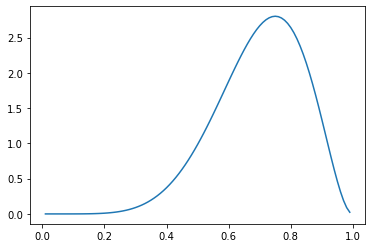

In [6]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
a =  7
b = 3
x = np.arange (0.01, 1, 0.01)
y = beta.pdf(x,a,b)
plt.plot(x,y)